# __Portfolio Selection__

In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection.benchmarks import *
import matplotlib.patches as mpatches
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity

In [2]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.tail(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,4750.0,1980.0,180.0,2170.925049,231.789001,1850.0,2270.0,2152.173828,422.0,875.0,...,348.313202,860.0,216.0,590.0,197.0,1625.0,9350.0,326.0,112.500008,204.0
2020-07-14,4720.0,1990.0,185.0,2200.000000,231.789001,1880.0,2260.0,2142.608643,430.0,890.0,...,344.587921,875.0,226.0,590.0,195.0,1610.0,9375.0,330.0,114.000000,202.0
2020-07-15,4710.0,1980.0,195.0,2210.000000,231.789001,1850.0,2270.0,2133.043457,428.0,940.0,...,339.000000,875.0,226.0,580.0,200.0,1625.0,9375.0,338.0,107.000000,204.0
2020-07-16,4700.0,1990.0,194.0,2220.000000,231.789001,1825.0,2250.0,2056.521729,438.0,940.0,...,339.000000,870.0,250.0,590.0,200.0,1675.0,9350.0,328.0,102.000000,208.0
2020-07-17,4670.0,1995.0,200.0,2190.000000,234.000000,1870.0,2260.0,2133.043457,438.0,945.0,...,340.000000,865.0,234.0,600.0,204.0,1725.0,9600.0,324.0,98.000000,208.0
2020-07-20,4540.0,2000.0,212.0,2160.000000,226.000000,1870.0,2250.0,2190.434814,436.0,990.0,...,324.000000,880.0,218.0,600.0,202.0,1800.0,9600.0,322.0,101.000000,202.0
2020-07-21,4680.0,2000.0,216.0,2190.000000,238.000000,1875.0,2300.0,2152.173828,430.0,1005.0,...,334.000000,875.0,224.0,600.0,195.0,1790.0,9800.0,324.0,98.000000,202.0
2020-07-22,4670.0,2010.0,226.0,2260.000000,238.000000,1875.0,2260.0,2200.000000,434.0,1000.0,...,330.000000,880.0,212.0,600.0,195.0,1800.0,9750.0,324.0,98.000000,202.0
2020-07-23,4710.0,1995.0,220.0,2330.000000,238.000000,1880.0,2300.0,2200.000000,442.0,1015.0,...,324.000000,875.0,214.0,600.0,196.0,1915.0,9725.0,336.0,100.000000,204.0


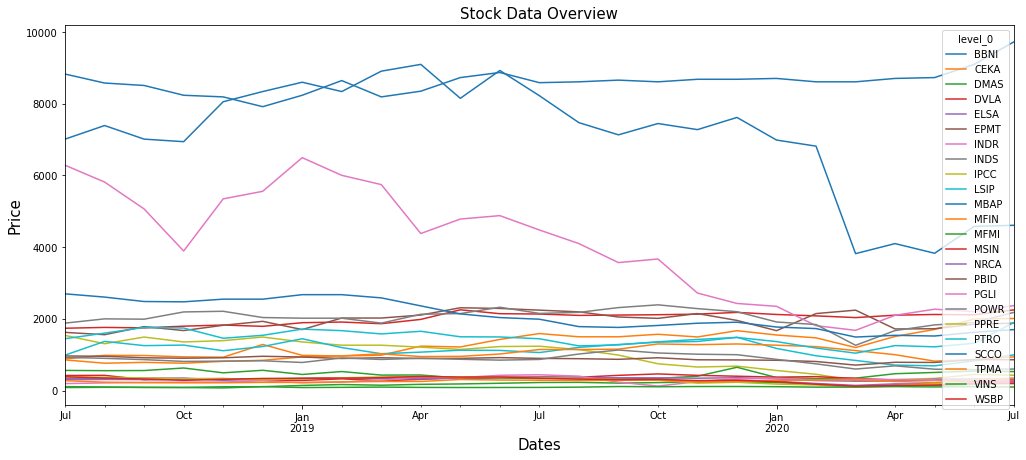

In [3]:
# Taking a quick look at the data
stock_prices.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Stock Data Overview', size=15)
plt.show()

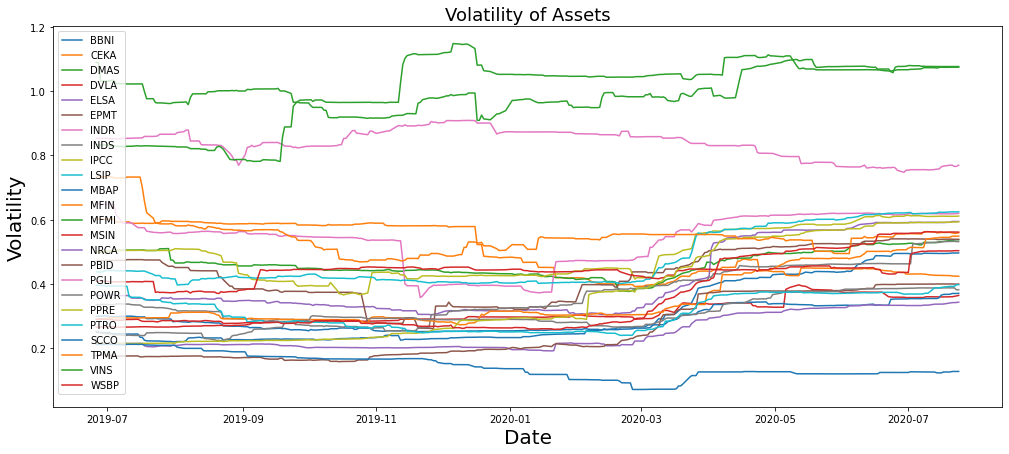

In [4]:
# plotting the volatility of our stocks
volatility = stock_prices.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices.columns, loc='upper left')
plt.show()

In [6]:
# building our equal_weighting HERC portfolio
hercEW = HierarchicalEqualRiskContribution()
hercEW.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                risk_measure='equal_weighting')
hercEW.weights.T

,0
level_0,
INDS,0.062500
TPMA,0.062500
PGLI,0.062500
VINS,0.020833
CEKA,0.020833
MFMI,0.020833
MSIN,0.062500
SCCO,0.062500
EPMT,0.062500


In [7]:
print('The optimal number of clusters is: ' + str(hercEW.optimal_num_clusters))

The optimal number of clusters is: 10


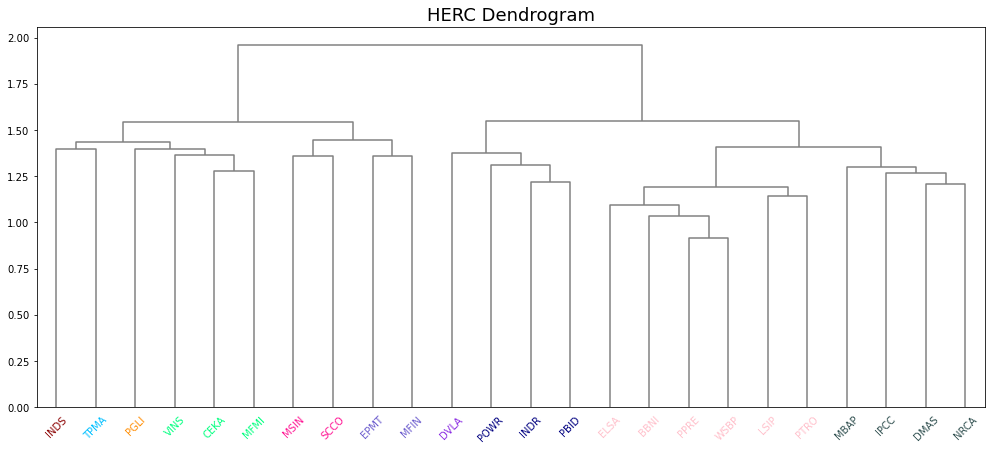

In [8]:
plt.figure(figsize=(17,7))
hercEW.plot_clusters(assets=stock_prices.columns)
plt.title('HERC Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

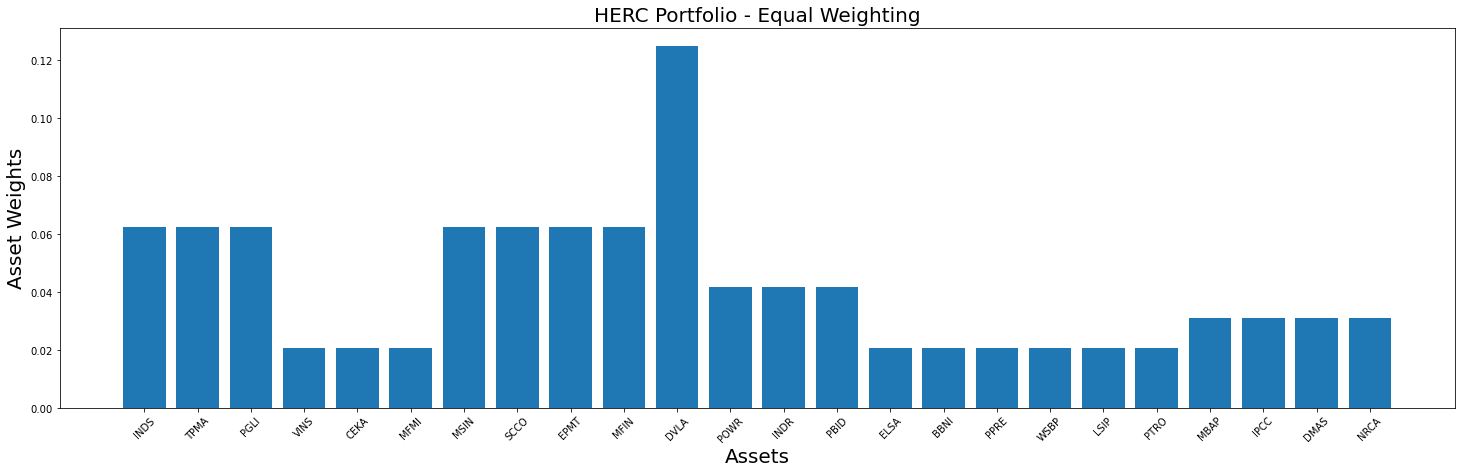

In [9]:
# plotting our optimal portfolio
hercEW_weights = hercEW.weights
y_pos = np.arange(len(hercEW_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercEW_weights.columns), hercEW_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Equal Weighting', size=20)
plt.show()

In [10]:
# building our variance HERC portfolio
hercMV = HierarchicalEqualRiskContribution()
hercMV.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=6,
                risk_measure='variance')
hercMV.weights

level_0,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN,...,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,MBAP,IPCC,DMAS,NRCA
0,0.022251,0.010296,0.005364,0.003858,0.01307,0.003043,0.012879,0.088485,0.010355,0.013764,...,0.024309,0.035084,0.029907,0.029632,0.020279,0.037868,0.059492,0.018921,0.021782,0.072392


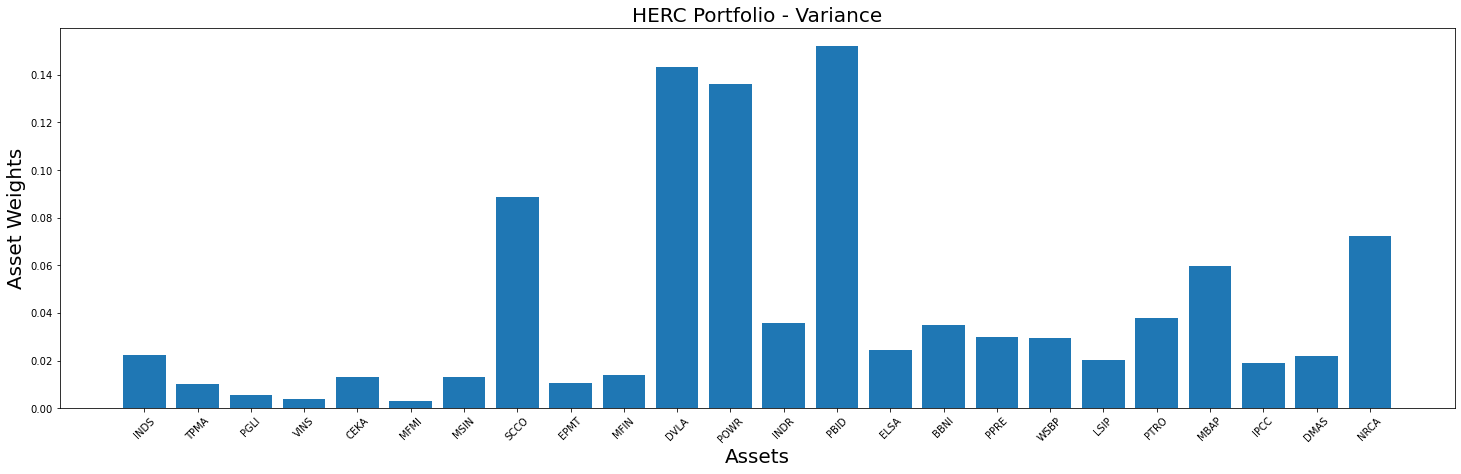

In [11]:
# plotting our optimal portfolio
hercMV_weights = hercMV.weights
y_pos = np.arange(len(hercMV_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercMV_weights.columns), hercMV_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Variance', size=20)
plt.show()

In [12]:
# building our HRP portfolio
hrp = HierarchicalRiskParity()
hrp.allocate(asset_names=stock_prices.columns,
             asset_prices=stock_prices)
hrp.weights

level_0,EPMT,TPMA,PGLI,MSIN,VINS,MFIN,SCCO,INDS,DVLA,MFMI,...,NRCA,MBAP,IPCC,DMAS,PTRO,LSIP,ELSA,BBNI,PPRE,WSBP
0,0.040804,0.024435,0.015781,0.051299,0.011885,0.056789,0.332322,0.051042,0.099942,0.008279,...,0.046015,0.040976,0.010703,0.012321,0.017776,0.006914,0.008288,0.015326,0.008275,0.008199


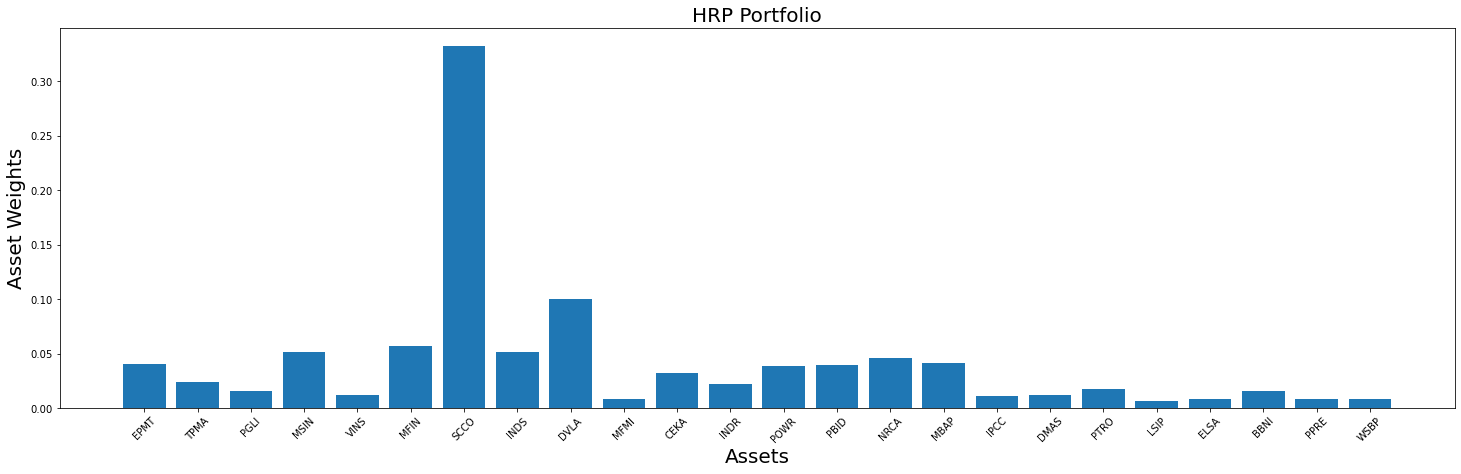

In [13]:
# plotting our optimal portfolio
hrp_weights = hrp.weights
y_pos = np.arange(len(hrp_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_weights.columns), hrp_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP Portfolio', size=20)
plt.show()

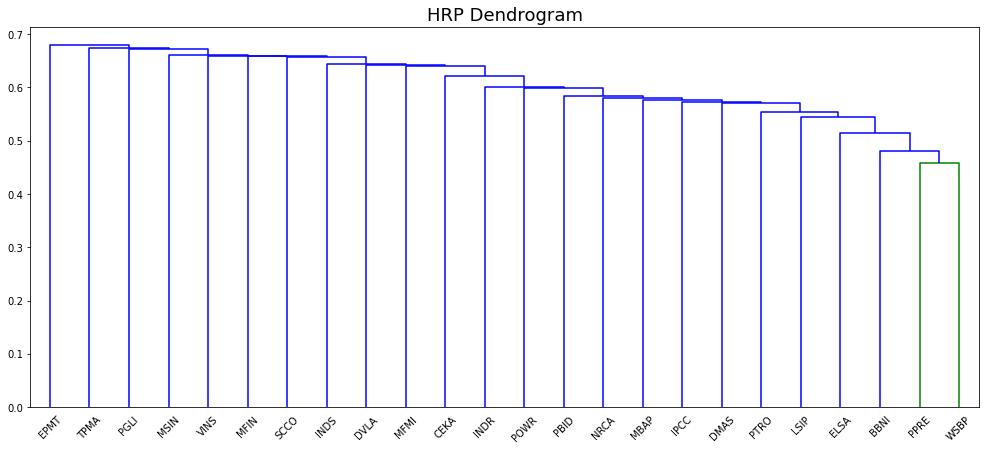

In [14]:
plt.figure(figsize=(17,7))
hrp.plot_clusters(stock_prices.columns)
plt.title('HRP Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

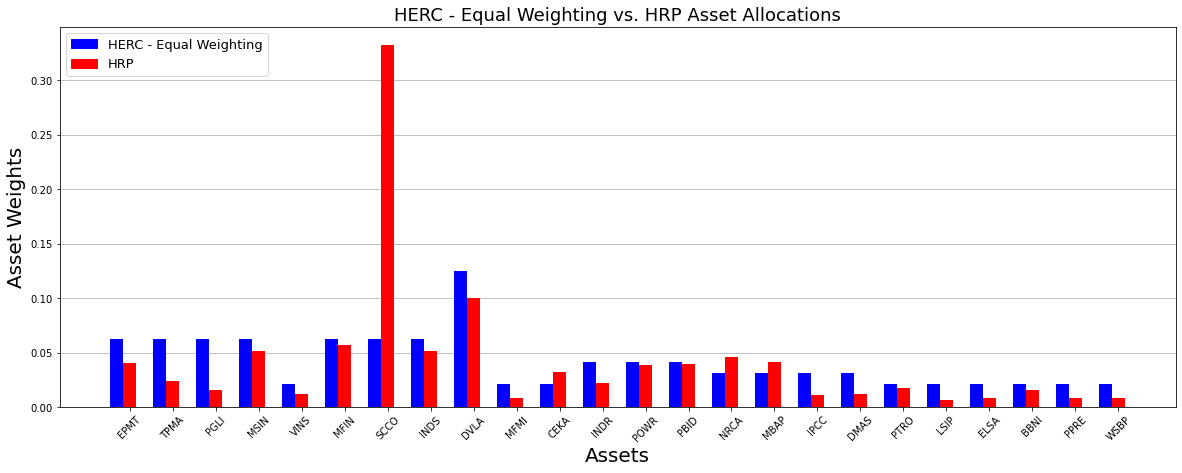

In [15]:
# plotting our HERC (Equal Weighting) vs. HRP comparison graph
hercEW_weights = hercEW_weights[hrp_weights.columns]

x = np.arange(len(hrp_weights.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hrp_weights.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_weights, rotation=45, size=10)
plt.title('HERC - Equal Weighting vs. HRP Asset Allocations', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Equal Weighting')
red_patch = mpatches.Patch(color='red', label='HRP')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

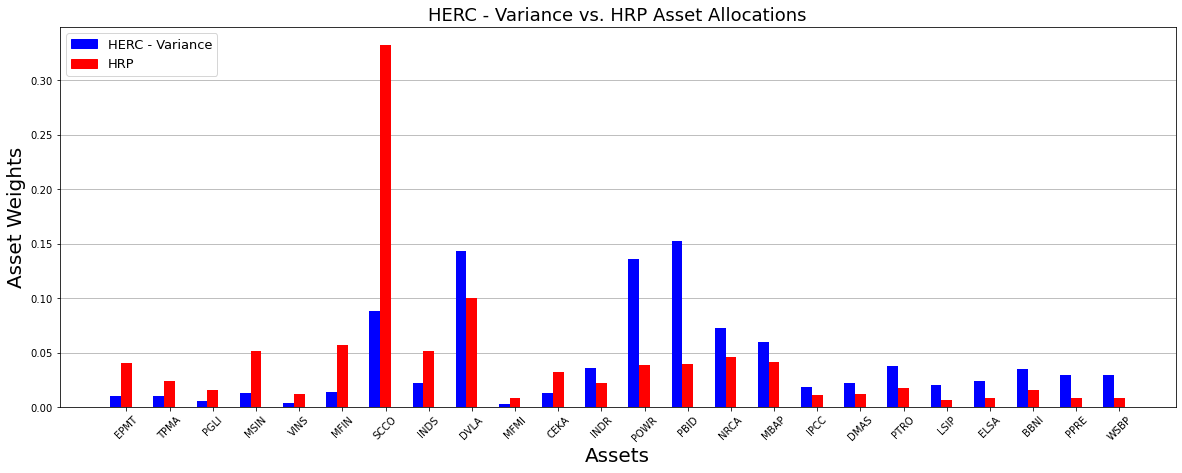

In [16]:
# plotting our HERC (Variance) vs. HRP comparison graph
hercMV_weights = hercMV_weights[hrp_weights.columns]

x = np.arange(len(hrp_weights.columns))
bar_width = 0.25

plt.figure(figsize=(20,7))
plt.bar(x, hercMV_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hrp_weights.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercMV_weights, rotation=45, size=10)
plt.title('HERC - Variance vs. HRP Asset Allocations', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Variance')
red_patch = mpatches.Patch(color='red', label='HRP')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

## Best Constant Rebalanced Portfolio Strategy

In [17]:
bcrp = BCRP()
bcrp.allocate(stock_prices)

In [18]:
print(bcrp.all_weights.iloc[0])
bcrp.all_weights.iloc[[0,-1]]

level_0
BBNI    0.002175
CEKA    0.002175
DMAS    0.528722
DVLA    0.002175
ELSA    0.002185
EPMT    0.002182
INDR    0.002196
INDS    0.002179
IPCC    0.002176
LSIP    0.002190
MBAP    0.002183
MFIN    0.002180
MFMI    0.214534
MSIN    0.002185
NRCA    0.002173
PBID    0.002185
PGLI    0.002195
POWR    0.002175
PPRE    0.002185
PTRO    0.002183
SCCO    0.002176
TPMA    0.210937
VINS    0.002187
WSBP    0.002170
Name: 2018-07-09 00:00:00, dtype: float64


level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-09,0.002175,0.002175,0.528722,0.002175,0.002185,0.002182,0.002196,0.002179,0.002176,0.00219,...,0.002173,0.002185,0.002195,0.002175,0.002185,0.002183,0.002176,0.210937,0.002187,0.00217
2020-07-24,0.002175,0.002175,0.528722,0.002175,0.002185,0.002182,0.002196,0.002179,0.002176,0.00219,...,0.002173,0.002185,0.002195,0.002175,0.002185,0.002183,0.002176,0.210937,0.002187,0.00217


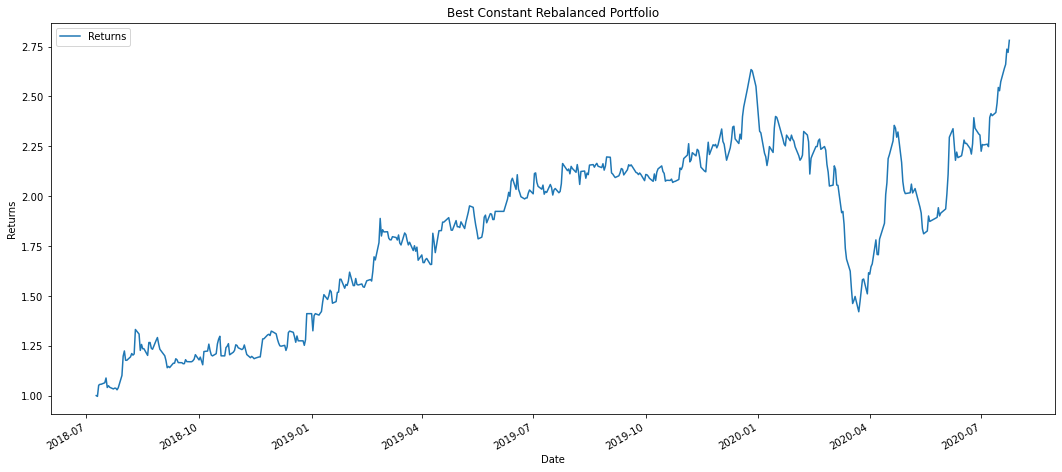

In [19]:
bcrp.portfolio_return.plot(title='Best Constant Rebalanced Portfolio', figsize=(18,8)).set_ylabel('Returns');

In [20]:
monthly_bcrp = BCRP()
# 'M' represents monthly rebalancing
monthly_bcrp.allocate(stock_prices, resample_by='M')
print(monthly_bcrp.all_weights.iloc[0])

level_0
BBNI    0.000000
CEKA    0.221114
DMAS    0.680624
DVLA    0.000000
ELSA    0.000000
EPMT    0.000000
INDR    0.000000
INDS    0.000000
IPCC    0.000000
LSIP    0.000000
MBAP    0.000000
MFIN    0.000000
MFMI    0.000000
MSIN    0.000000
NRCA    0.000000
PBID    0.000000
PGLI    0.098263
POWR    0.000000
PPRE    0.000000
PTRO    0.000000
SCCO    0.000000
TPMA    0.000000
VINS    0.000000
WSBP    0.000000
Name: 2018-07-31 00:00:00, dtype: float64
